# Linear Regression using Neural Network

This notebook shows how a Neural Networks performs a simple linear regression between two variables. To make things plottable, I'm going to generate one dimensional $X$ then calculate $y$ as a polynomial function of $x$, and of course add randomness

In [1]:
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

### Generate fake data for training

To create the independent variabe *x*, we use `torch.randn`. It returns a tensor with *n* number of samples from a normally distibuted data. 

We calcuate *y* from *x* using any linear or non-linear formula we wish. Here I'm using:

$y= 2.5.x^3 + x^2 - 5.x + x - 3 + \epsilon$


Text(0, 0.5, 'Dependent Variable Y')

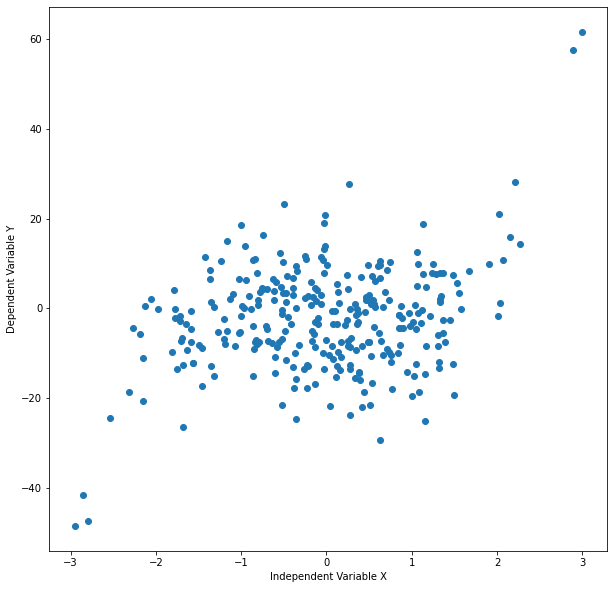

In [3]:
n= 300
torch.manual_seed(11)
x = torch.randn(n)
y = 2.5 * x**3 + x**2 - 5* x - 3 + 10 * torch.randn(n)

plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel('Independent Variable X')
plt.ylabel('Dependent Variable Y')

# Neural Network 

Here I'm building a simple NN that contains two linear layers with a sigmoid activation in between. And defining a `learn` function that optimizes the weights and biases using Gradient Descent algorithm to minimize Mean Squared Errors as a cost function.


In [67]:
class Net(nn.Module):
    def __init__(self,inputs=1, outputs=1):
        super().__init__()
        self.layer = nn.Sequential(nn.Linear(inputs, 16),
        nn.Sigmoid(),
        nn.Linear(16, outputs),
        )
        
    def forward(self,x):
        return self.layer(x)

    def learn(self,epochs,x,y,lr):
        loss_fun = nn.MSELoss()
        optimizer = torch.optim.SGD(self.parameters(),lr=lr)
        losses=[]
        for epoch in range(epochs):
            optimizer.zero_grad()
            output = self(x)
            loss = loss_fun(output,y)
            losses.append(loss.item())
            loss.backward()
            if epoch%100==0:
                print("epoch:{} loss: {}".format(epoch,round(loss.item(),8)))
            optimizer.step()
        return losses
    
    @torch.no_grad()
    def predict(self,x):
        y = self(x)
        return y

net = Net(1,1)

Now we train the network for 1000 epochs and a learning rate of 1e-1

In [68]:
EPOCHS = 1000
LR = 1e-1

# Normalize the features for training
x_train = ((x - x.mean())/x.std()).view(-1,1)
losses = net.learn(EPOCHS,x_train,y.view(-1,1),LR)

epoch:0 loss: 143.19700623
epoch:100 loss: 126.15518188
epoch:200 loss: 111.19872284
epoch:300 loss: 98.72764587
epoch:400 loss: 92.60422516
epoch:500 loss: 88.71993256
epoch:600 loss: 86.44686127
epoch:700 loss: 89.9169693
epoch:800 loss: 85.36412811
epoch:900 loss: 85.45270538


Let's plot the losses

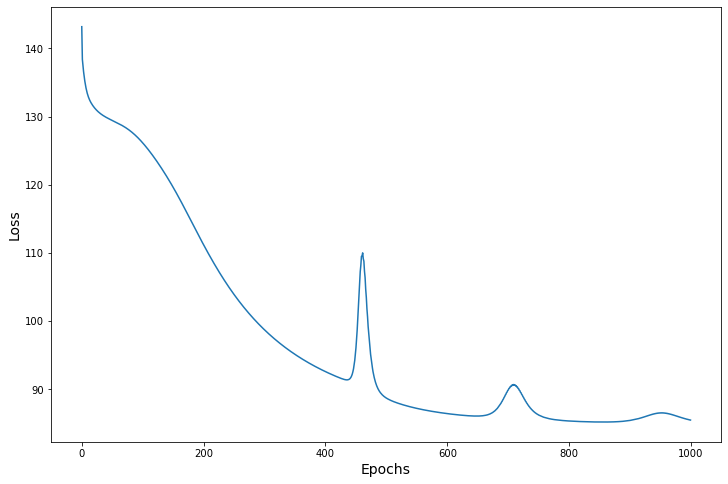

In [69]:
plt.figure(figsize=(12,8))
plt.plot(losses)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14);

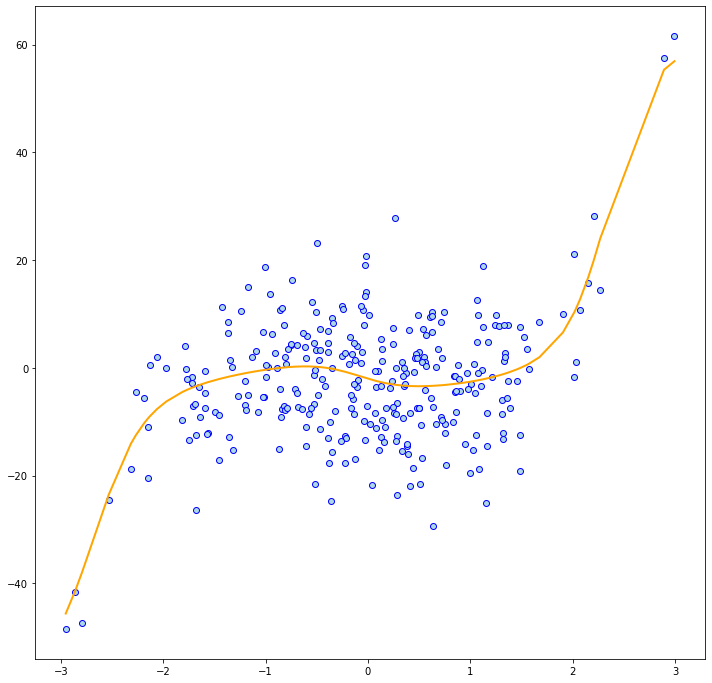

In [75]:
# value-sort x for plottable predictions
sort_idx = torch.argsort(x)
y_hat= net.predict(x_train[sort_idx])


marker_style = dict(color='blue',linestyle='None', marker='o', markersize=6, markeredgecolor='blue', markerfacecolor='lightblue')

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.plot(x,y,**marker_style)
ax.plot(x[sort_idx],y_hat, color='orange', lw=2);